In [415]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [416]:
sleep = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sleep_health_and_lifestyle_dataset.csv")

In [417]:
sleep.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


<Axes: xlabel='Sleep Disorder', ylabel='count'>

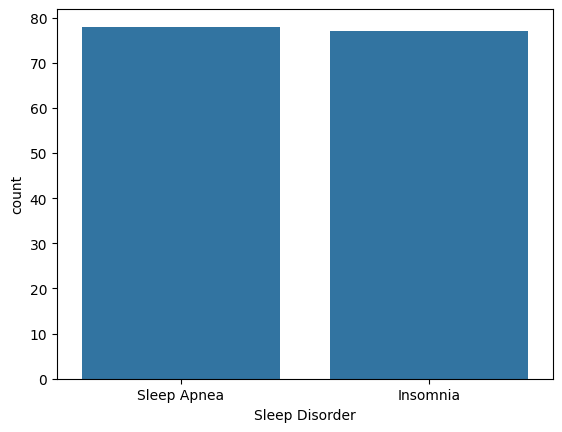

In [418]:
sns.countplot(x = 'Sleep Disorder', data = sleep)

<Axes: xlabel='Occupation', ylabel='count'>

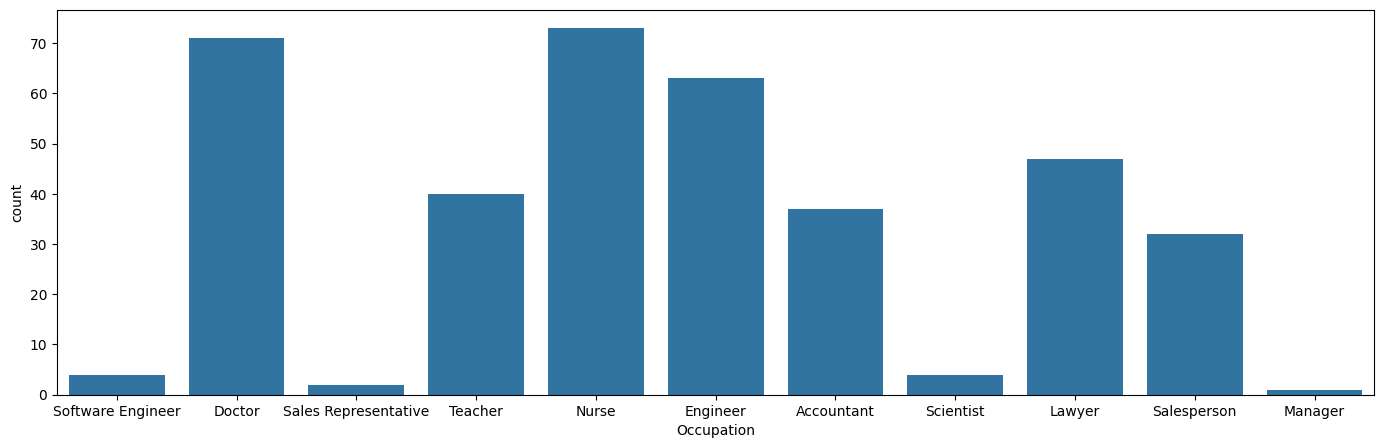

In [419]:
plt.figure(figsize = (17, 5))
sns.countplot(x = 'Occupation', data = sleep)

In [420]:
sleep['Occupation'].value_counts()

,count
Occupation,
Nurse,73
Doctor,71
Engineer,63
Lawyer,47
Teacher,40
Accountant,37
Salesperson,32
Software Engineer,4
Scientist,4


<Axes: xlabel='Gender', ylabel='count'>

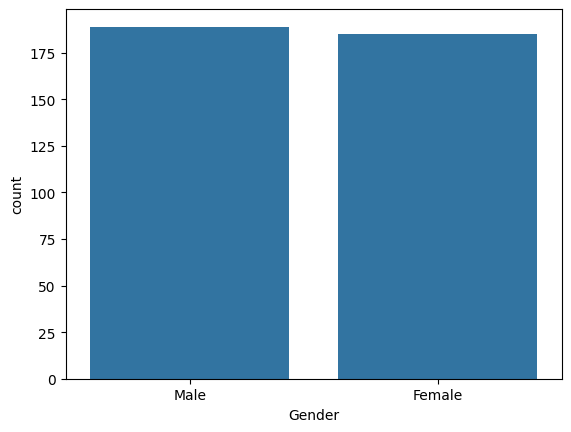

In [421]:
sns.countplot(x = 'Gender', data = sleep)

<Axes: xlabel='Age', ylabel='Sleep Duration'>

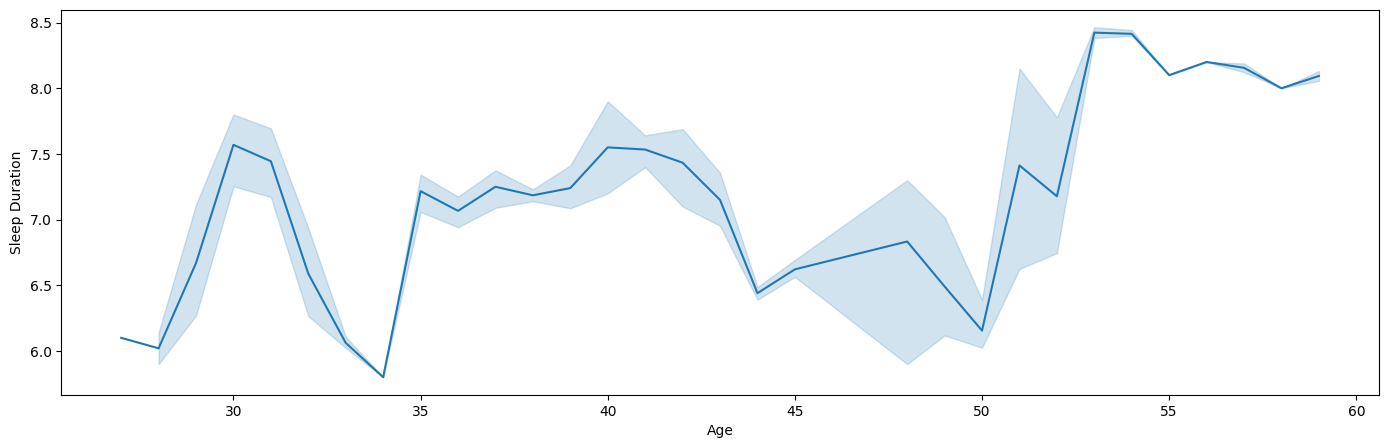

In [422]:
plt.figure(figsize = (17, 5))
sns.lineplot(x = 'Age', y = 'Sleep Duration', data = sleep)

<Axes: xlabel='Occupation', ylabel='Sleep Duration'>

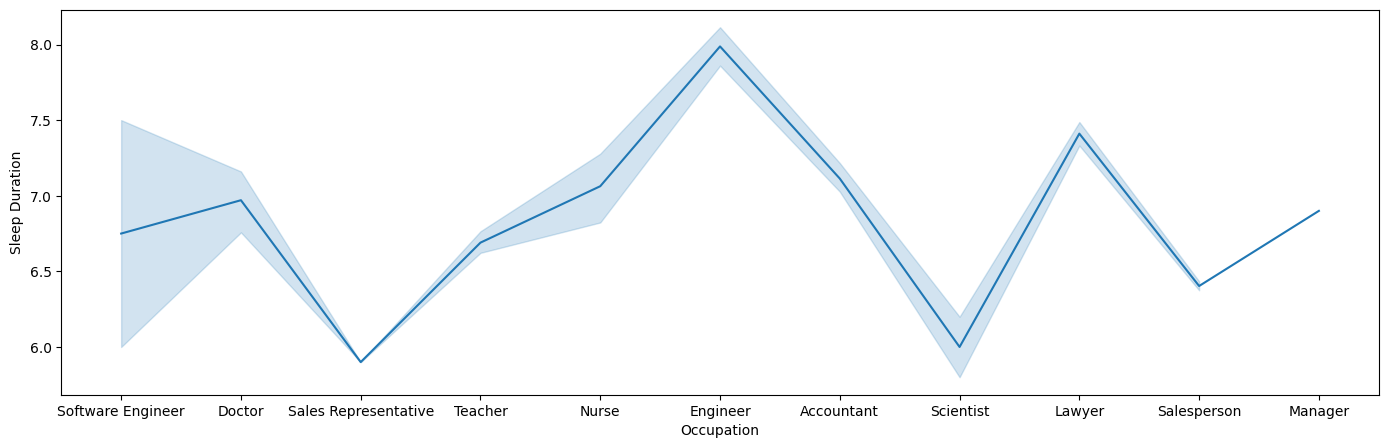

In [423]:
plt.figure(figsize = (17, 5))
sns.lineplot(x = 'Occupation', y = 'Sleep Duration', data = sleep)

<Axes: xlabel='Quality of Sleep', ylabel='count'>

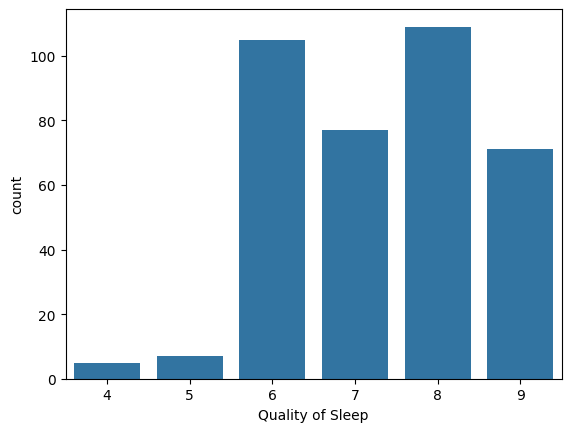

In [424]:
sns.countplot(x = 'Quality of Sleep', data = sleep)

<Axes: xlabel='BMI Category', ylabel='count'>

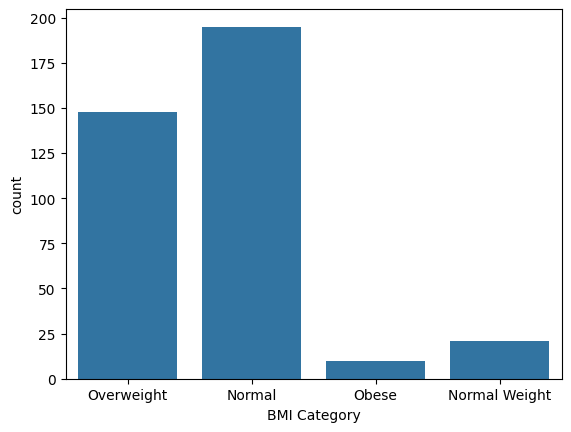

In [425]:
sns.countplot(x = 'BMI Category', data = sleep)

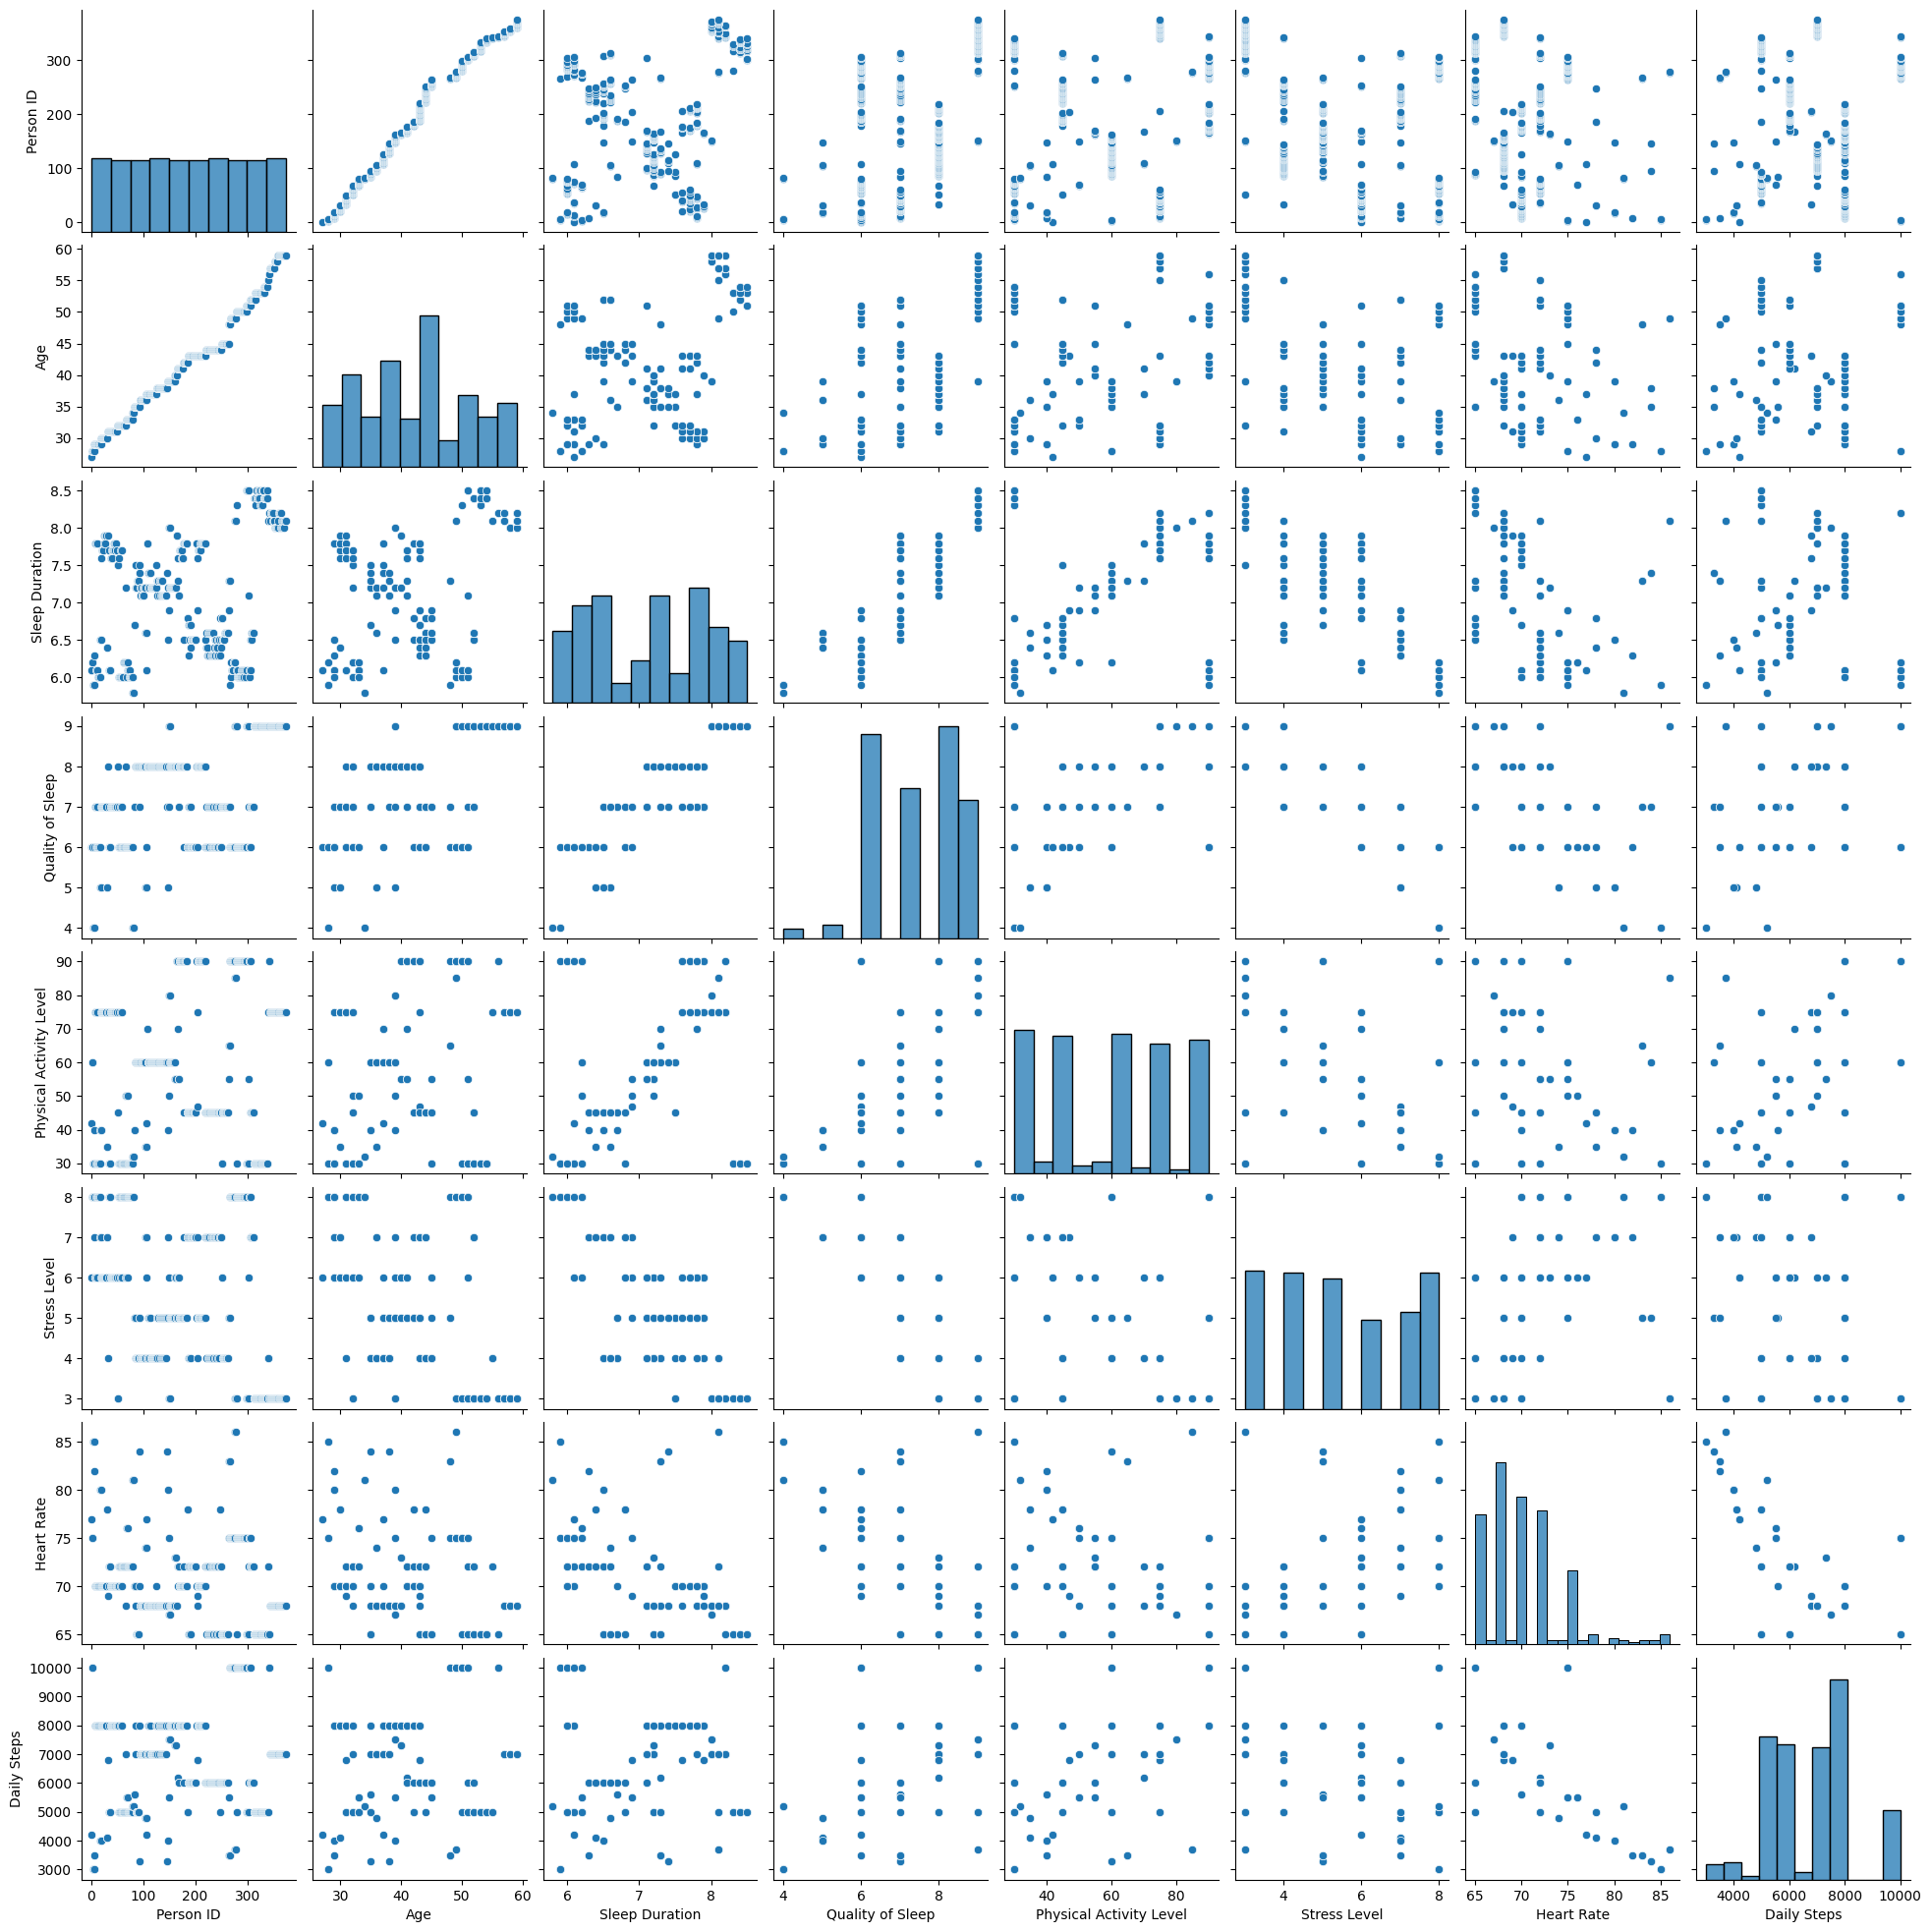

In [426]:
sns.pairplot(sleep)

<Axes: xlabel='Occupation', ylabel='BMI Category'>

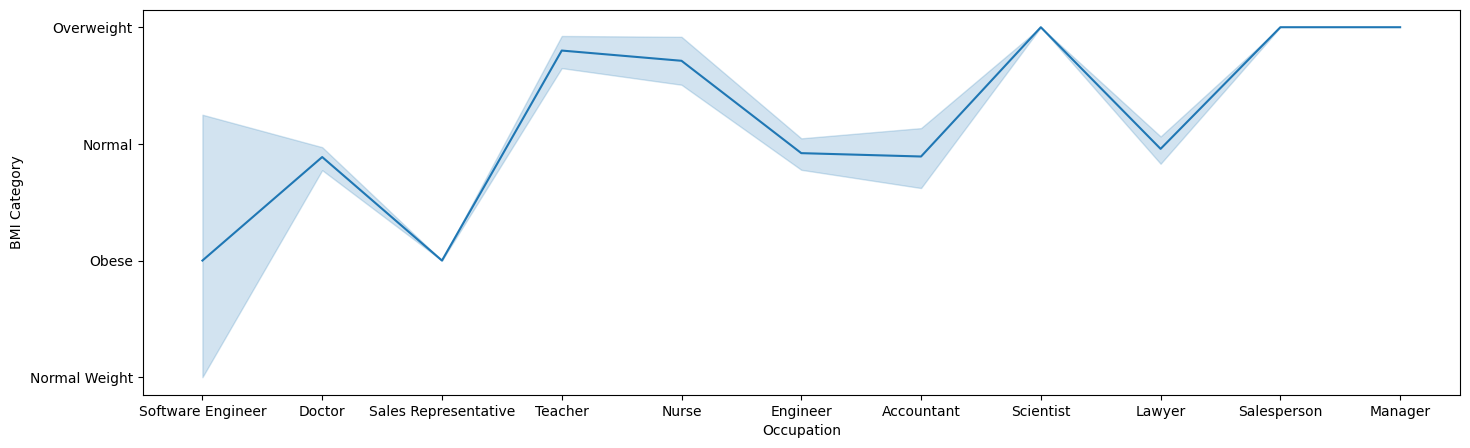

In [427]:
plt.figure(figsize = (17, 5))
sns.lineplot(x = 'Occupation', y = 'BMI Category', data = sleep)

In [428]:
sleep['Sleep Disorder']

,Sleep Disorder
0,NaN
1,NaN
2,NaN
3,Sleep Apnea
4,Sleep Apnea
...,...
369,Sleep Apnea
370,Sleep Apnea
371,Sleep Apnea
372,Sleep Apnea


In [429]:
sleep['Sleep Disorder'] = sleep['Sleep Disorder'].fillna('Sleep Apnea')

In [430]:
sleep['Sleep Disorder']

,Sleep Disorder
0,Sleep Apnea
1,Sleep Apnea
2,Sleep Apnea
3,Sleep Apnea
4,Sleep Apnea
...,...
369,Sleep Apnea
370,Sleep Apnea
371,Sleep Apnea
372,Sleep Apnea


<Axes: xlabel='Sleep Disorder', ylabel='count'>

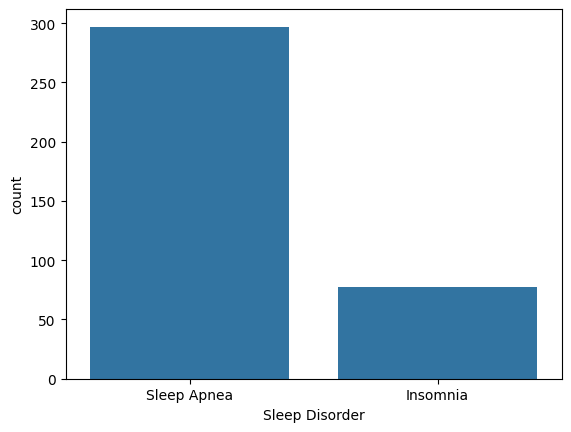

In [431]:
sns.countplot(x = 'Sleep Disorder', data = sleep)

In [432]:
sleep['Sleep Disorder'] = sleep['Sleep Disorder'].replace({'Sleep Apnea': 1, 'Insomnia': 2})

<ipython-input-432-d8ffb3c56799>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sleep['Sleep Disorder'] = sleep['Sleep Disorder'].replace({'Sleep Apnea': 1, 'Insomnia': 2})


In [433]:
print(sleep['Sleep Disorder'] == 'Insomnia')

0      False
1      False
2      False
3      False
4      False
       ...  
369    False
370    False
371    False
372    False
373    False
Name: Sleep Disorder, Length: 374, dtype: bool


<Axes: xlabel='Sleep Disorder', ylabel='count'>

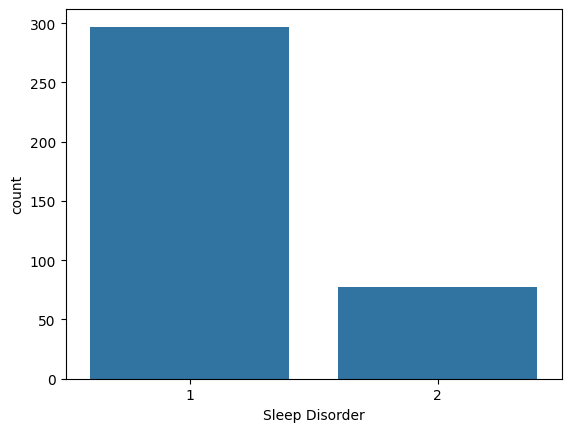

In [434]:
sns.countplot(x = 'Sleep Disorder', data = sleep)

In [435]:
columns_to_scale = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level']
columns_to_encode = ['Gender', 'Occupation']

preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), columns_to_scale),
        ('encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), columns_to_encode)
    ],
    remainder='passthrough'
)


In [436]:
sleep['Gender'] = sleep['Gender'].replace({'Female': 0, 'Male': 1})

<ipython-input-436-ac3873c9e552>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sleep['Gender'] = sleep['Gender'].replace({'Female': 0, 'Male': 1})


In [437]:
sleep['Gender'].value_counts()

,count
Gender,
1,189
0,185


In [438]:
sleep['Occupation']

,Occupation
0,Software Engineer
1,Doctor
2,Doctor
3,Sales Representative
4,Sales Representative
...,...
369,Nurse
370,Nurse
371,Nurse
372,Nurse


In [439]:
sleep['Occupation'] = sleep['Occupation'].replace({'Software Engineer': 0, 'Doctor': 1, 'Sales Representative': 2, 'Nurse': 3, 'Accountant': 4, 'Lawyer': 5, 'Teacher': 6, 'Scientist': 7, 'Manager': 8, 'Engineer': 9, 'Salesperson': 10})

<ipython-input-439-86ed89377735>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sleep['Occupation'] = sleep['Occupation'].replace({'Software Engineer': 0, 'Doctor': 1, 'Sales Representative': 2, 'Nurse': 3, 'Accountant': 4, 'Lawyer': 5, 'Teacher': 6, 'Scientist': 7, 'Manager': 8, 'Engineer': 9, 'Salesperson': 10})


In [440]:
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,0,6.1,6,42,6,Overweight,126/83,77,4200,1
1,2,1,28,1,6.2,6,60,8,Normal,125/80,75,10000,1
2,3,1,28,1,6.2,6,60,8,Normal,125/80,75,10000,1
3,4,1,28,2,5.9,4,30,8,Obese,140/90,85,3000,1
4,5,1,28,2,5.9,4,30,8,Obese,140/90,85,3000,1


In [441]:
sleep['BMI Category'] = sleep['BMI Category'].replace({'Normal': 0, 'Overweight': 1, 'Obese': 2, 'Normal Weight': 3})

<ipython-input-441-edf8756893ae>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sleep['BMI Category'] = sleep['BMI Category'].replace({'Normal': 0, 'Overweight': 1, 'Obese': 2, 'Normal Weight': 3})


In [442]:
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,0,6.1,6,42,6,1,126/83,77,4200,1
1,2,1,28,1,6.2,6,60,8,0,125/80,75,10000,1
2,3,1,28,1,6.2,6,60,8,0,125/80,75,10000,1
3,4,1,28,2,5.9,4,30,8,2,140/90,85,3000,1
4,5,1,28,2,5.9,4,30,8,2,140/90,85,3000,1


In [443]:
sleep[['systolic', 'diastolic']] = sleep['Blood Pressure'].str.split('/', expand=True).astype(int)
sleep = sleep.drop('Blood Pressure', axis=1)

In [444]:
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic,diastolic
0,1,1,27,0,6.1,6,42,6,1,77,4200,1,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,4,1,28,2,5.9,4,30,8,2,85,3000,1,140,90
4,5,1,28,2,5.9,4,30,8,2,85,3000,1,140,90


In [445]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    int64  
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    int64  
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    int64  
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    int64  
 12  systolic                 374 non-null    int64  
 13  diastolic                374 non-null    int64  
dtypes: float64(1), int64(13)
m

In [446]:
X = sleep.drop('Sleep Disorder', axis = 1)
y = sleep['Sleep Disorder']

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [448]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [449]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(299, 13)
(75, 13)
(299,)
(75,)


In [450]:
modeler = Sequential([
    Dense(64, activation='relu', input_shape=(13,), kernel_initializer='he_normal'),  # Use He initialization
    Dense(32, activation='relu', kernel_initializer='he_normal'),
    Dense(16, activation='relu', kernel_initializer='he_normal'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [451]:
import keras
from tensorflow.keras.optimizers import Adam
modeler.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
                                    loss='binary_crossentropy',
                                    metrics=['accuracy'])

In [452]:
modeler.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7916 - loss: 0.2994 - val_accuracy: 0.7067 - val_loss: -0.2849
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8458 - loss: -0.1380 - val_accuracy: 0.7067 - val_loss: -0.7776
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8238 - loss: -0.5278 - val_accuracy: 0.7067 - val_loss: -1.2592
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8124 - loss: -0.8677 - val_accuracy: 0.7067 - val_loss: -1.7861
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8099 - loss: -1.2320 - val_accuracy: 0.7067 - val_loss: -2.4529
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8170 - loss: -1.6408 - val_accuracy: 0.7067 - val_loss: -3.3693
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8311 - loss: -2.1551 - val_accuracy: 0.7067 - val_loss: -4.7117
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8259 - loss: -3.0507 - val_accur

In [453]:
hist = modeler.history.history

<Axes: >

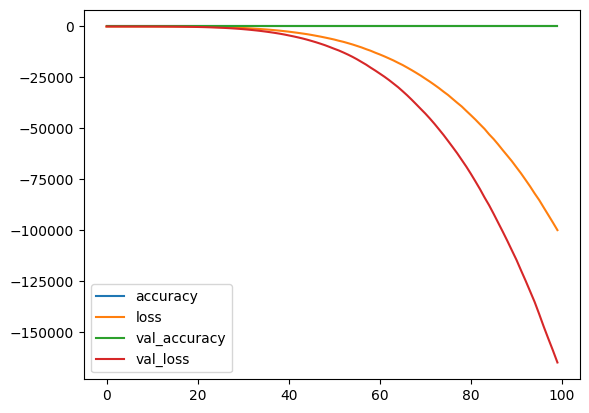

In [454]:
hist = pd.DataFrame(hist)
hist.plot()

In [455]:
modeler.save('sleep_model.h5')